## Exercise 1
1. Download the `wdbc.names` and `wdbc.data` text files in the Lab8 folder on GitHub. These come from the UCI repository https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)  (Note I have cleaned the data some for you, so don't download it from the website, use the ones in the GitHub folder)
1. Use the native `open` command of Python to display the txt file `wdbc.names`
1. Read the dataset from the `wdbc.data` file into a variable called `data` using pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
open('wdbc.names', 'r').read()
data = pd.read_csv('wdbc.data', header=None)

## Exercise 2
1. Display the data header using pandas
1. Are there any columns that are not useful to analyzing this data?
1. Decide what to do with the non-numerical data values, and modify your dataframe
1. Extract the column of labels (Malignant or Benign, which should now be numerical values) from the dataframe and store it as a variable called `labels`

In [2]:
(data.head())

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
Malig = data[1] == 'M'
Ben = data[1] == 'B'
data.loc[Malig, 1] = 0
data.loc[Ben, 1] = 1
labels = np.array(data.iloc[:,1])

## Exercise 3
1. Plot the data in 5 different ways of your choosing (i.e., plot column 2 vs. column 3 or column 8 vs. column 1, etc.)
    1. Your plot should be a scatter plot and should color the points according to whether the cancer is Malignant or Benign
1. Use the scatter_matrix function from pandas to create the scatter matrix for this dataframe
1. Now, create new variables `x` and `y` which are numpy arrays from your `data` and `labels` dataframes
1. Using these, run the segment of code in the cell below which implements PCA on x (color code is green for benign and red for malignant)
1. Compare this plot to the ones from step 1. Do you notice any difference? Do you think it would be easier to separate malignant and benign tumors based on one of these plots over the others?

In [4]:
x = np.array(data.loc[:, 2:])
y = np.array(data.loc[:, 1])
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

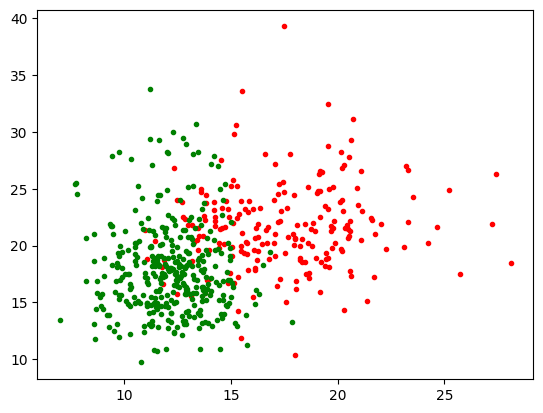

In [5]:
plt.figure()
plt.plot(x[y== 0,0],x[y== 0,1],'r.')
plt.plot(x[y== 1,0],x[y== 1,1],'g.')
plt.show()

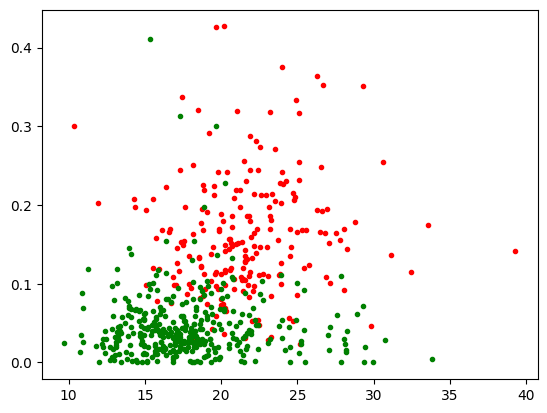

In [6]:
plt.figure()
plt.plot(x[y== 0,1],x[y== 0,6],'r.')
plt.plot(x[y== 1,1],x[y== 1,6],'g.')
plt.show()

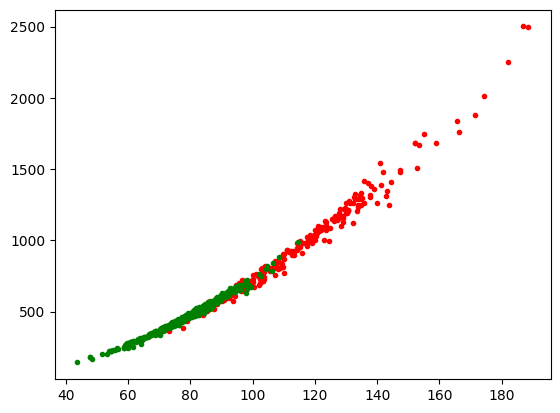

In [7]:
plt.figure()
plt.plot(x[y== 0,2],x[y== 0,3],'r.')
plt.plot(x[y== 1,2],x[y== 1,3],'g.')
plt.show()

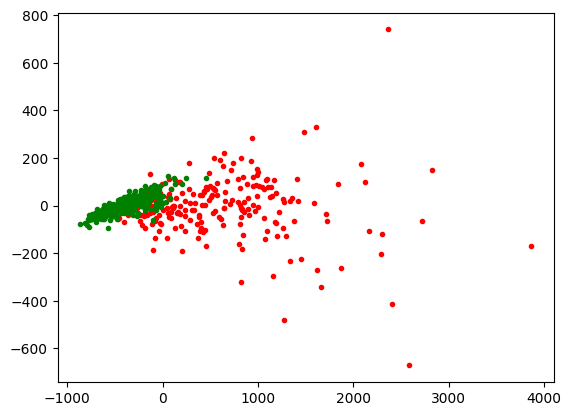

In [8]:
# you may need to run  pip install sklearn in Ubuntu  (may need pip3)
from sklearn.decomposition import PCA
import matplotlib
from matplotlib import pyplot as plt

plt.figure()
PCA3=PCA(n_components=2)
XPCA = PCA3.fit_transform(x)
plt.plot(XPCA[y==0,0],XPCA[y==0,1],'r.')
plt.plot(XPCA[y==1,0],XPCA[y==1,1],'g.')
plt.show()

## Exercise 4

1. Go to [https://archive.ics.uci.edu/ml/datasets/Adult] and download the adult.names and adult.data files.
1. Display the adult.names file in your jupyter notebook. Make 2 comments about what you notice about the data set (for example, format, different values, etc.)
1. -Using pandas, make a dataframe from the adult.data file and print its head()
1. Delete the column titled 'fnlwgt' from your dataframe
1. Plot a histogram showing how many people from each working class make above 50k per year and below 50k per year
1. Similarly, plot a histogram showing how many people from each education level make above and below 50k per year
1. Choose one other category and plot a histogram similar to the above
1. Discuss the results of these histograms. What (if any) conclusions can you draw from them?

In [14]:
#print(open("adult.names", 'r').read())
adult = pd.read_csv('adult.data', header=None)
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
adult.drop(2, axis=1)
working_class = np.array(adult.loc[:,1])
income = np.array(adult.loc[:,14])
fiftyk_above = adult[14] == ">50k"
fiftyk_below = adult[14] == "<=50k"
adult.loc[fiftyk_above, 14] = 0
adult.loc[fiftyk_below, 14] = 0
plt.figure()
plt.hist()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 640x480 with 0 Axes>

array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '2'}>],
       [<AxesSubplot: title={'center': '4'}>,
        <AxesSubplot: title={'center': '10'}>],
       [<AxesSubplot: title={'center': '11'}>,
        <AxesSubplot: title={'center': '12'}>]], dtype=object)

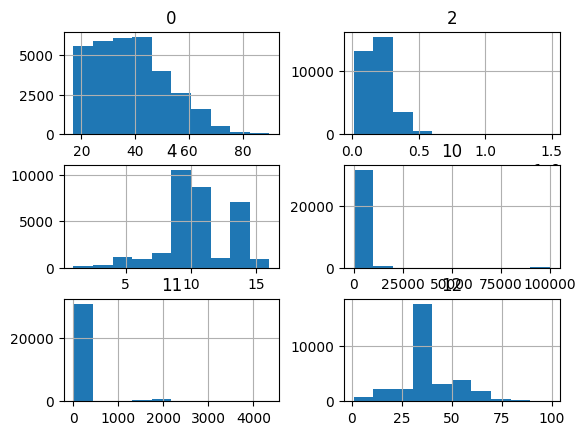

In [18]:
adult.hist()